<a href="https://colab.research.google.com/github/LonelyFriday/OCR_ElectricityBill/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://www.it24hrs.com/wp-content/uploads/2021/05/warning-do-not-post-bill-to-social-c.jpg
!wget https://prismic-io.s3.amazonaws.com/palmettoblog/172693e9-a059-46db-a600-0bc9b0a43bda_base-charge.png

--2024-06-10 17:21:23--  https://www.it24hrs.com/wp-content/uploads/2021/05/warning-do-not-post-bill-to-social-c.jpg
Resolving www.it24hrs.com (www.it24hrs.com)... 172.67.160.16, 104.21.14.165, 2606:4700:3032::ac43:a010, ...
Connecting to www.it24hrs.com (www.it24hrs.com)|172.67.160.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30637 (30K) [image/jpeg]
Saving to: ‘warning-do-not-post-bill-to-social-c.jpg.1’

warning-do-not-post 100%[===================>]  29.92K  --.-KB/s    in 0.007s  

2024-06-10 17:21:23 (4.09 MB/s) - ‘warning-do-not-post-bill-to-social-c.jpg.1’ saved [30637/30637]

--2024-06-10 17:21:23--  https://prismic-io.s3.amazonaws.com/palmettoblog/172693e9-a059-46db-a600-0bc9b0a43bda_base-charge.png
Resolving prismic-io.s3.amazonaws.com (prismic-io.s3.amazonaws.com)... 52.217.163.25, 16.182.64.249, 52.216.10.91, ...
Connecting to prismic-io.s3.amazonaws.com (prismic-io.s3.amazonaws.com)|52.217.163.25|:443... connected.
HTTP request sent, awaiti

In [16]:
!pip install pythainlp -q
!pip install pyicu -q

# Install Tesseract-OCR
!apt-get install tesseract-ocr-tha -q

# Install pytesseract and OpenCV
!pip install pytesseract opencv-python -q

Reading package lists...
Building dependency tree...
Reading state information...
tesseract-ocr-tha is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


# Code

In [ ]:
import cv2
import pytesseract
from pythainlp.tokenize import word_tokenize
from google.colab.patches import cv2_imshow

class ThaiOCR:
    def __init__(self, image_path):
        self.image_path = image_path
        self.image = cv2.imread(image_path)
        self.preprocessed_image = None
        self.extracted_text = None
        self.corrected_text = None

    def preprocess_image(self):
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

        # Adjust brightness and contrast
        alpha = 0.8  # Simple contrast control
        beta = 40    # Simple brightness control
        adjusted_image = cv2.convertScaleAbs(gray_image, alpha=alpha, beta=beta)

        # Apply some preprocessing to improve OCR accuracy
        # For example, thresholding
        _, thresh_image = cv2.threshold(adjusted_image, 180, 255, cv2.THRESH_BINARY)
        self.preprocessed_image = cv2.adaptiveThreshold(thresh_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    def imshow(self):
        cv2_imshow(self.preprocessed_image)

    def extract_text_eng(self):
        if self.preprocessed_image is None:
            raise ValueError("Image has not been preprocessed yet.")
        custom_config = r'--oem 3 --psm 6'
        self.extracted_text = pytesseract.image_to_string(self.preprocessed_image, config=custom_config)

    def extract_text_thai(self):
        if self.preprocessed_image is None:
            raise ValueError("Image has not been preprocessed yet.")
        custom_config = r'--oem 3 --psm 6 -l tha'
        self.extracted_text = pytesseract.image_to_string(self.preprocessed_image, config=custom_config)

    def correct_text(self):
        if self.extracted_text is None:
            raise ValueError("Text has not been extracted yet.")
        tokens = word_tokenize(self.extracted_text, engine='newmm')
        self.corrected_text = ''.join(tokens)

    def ocr_and_correct_eng(self):
        self.preprocess_image()
        self.extract_text_eng()
        self.correct_text()
        return self.corrected_text

    def ocr_and_correct_thai(self):
        self.preprocess_image()
        self.extract_text_thai()
        self.correct_text()
        return self.corrected_text

# Example

## English

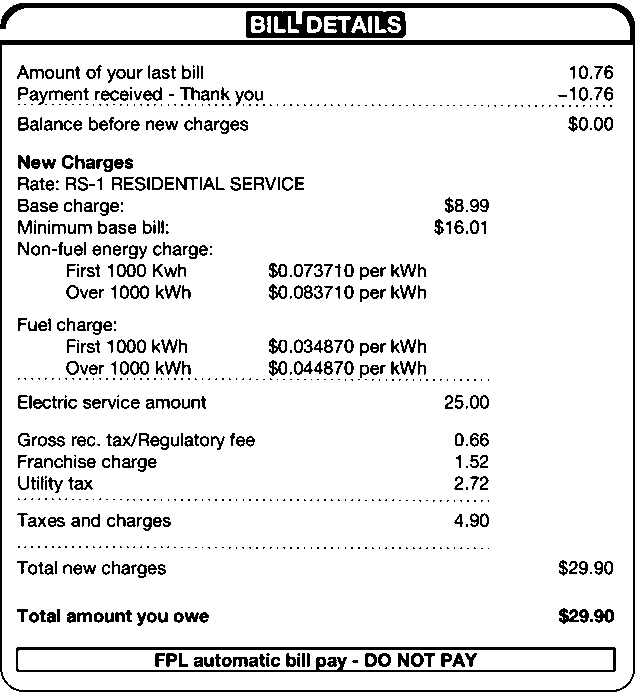

=e sr

Amount of your last bill 10.76
Payment received - Thank you cree O78
Balance before new charges $0.00
New Charges
Rate: RS-1 RESIDENTIAL SERVICE
Base charge: $8.99
Minimum base bill: $16.01
Non-fuel energy charge:

First 1000 Kwh $0.073710 per kWh

Over 1000 kWh $0,083710 per kWh
Fuel charge:

First 1000 kWh $0.034870 per kWh
sever ONOF1000 KWH... 80:044870 per kWh
Electric service amount 25.00
Gross rec. tax/Regulatory fee 0.66
Franchise charge 1.52
Utility tax 2.72
Taxes and charges 4.90
Total new charges $29.90
Total amount you owe $29.90

FPL automatic bill pay - OO NOT PAY



In [15]:
# Example English
image_path = '/content/172693e9-a059-46db-a600-0bc9b0a43bda_base-charge.png'
thai_ocr = ThaiOCR(image_path)
corrected_text = thai_ocr.ocr_and_correct_eng()
thai_ocr.imshow()
print(corrected_text)

## Thai

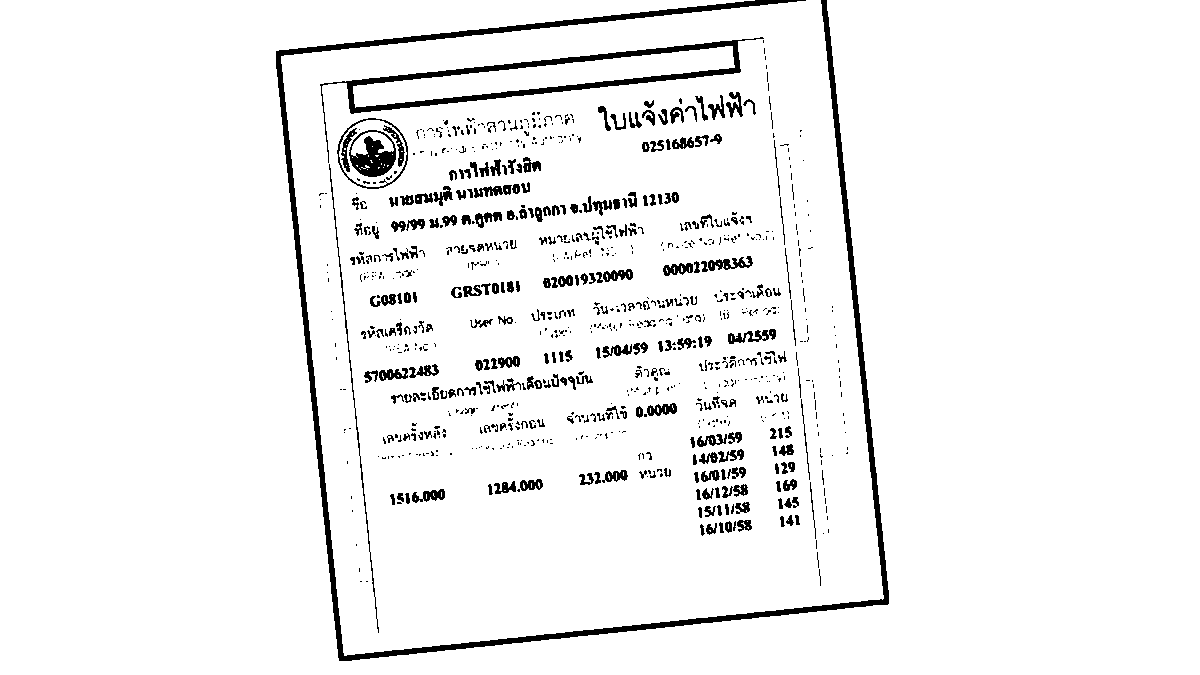

|
อใจกส เจโภกค        ..          1
 เรรกคน. แม   ใบแจ้งค่าไฟฟ้า  |
5555  การไฟฟ้ารังสิต   025168657  ว
| รือ นายสมมุติ หามทดสอน
ต่อยู 9ย9รม09 ตยูกค อเอ้าลูกกาจ.ปทุนธานี 13139         |
จหัลการไฟฟ้า ศายรตหนย หนายเลงผู้ใช้ไฟฟ้า  เลขดีใบเจ๊จข | |
1 [นออรม"  เห   นอ 5 1 เศสลท
0081401 085โร0เ9 อ20019320099 ลอ0022098363  1
1 0 จะเคพ วัน๓รอาถ่านหน่วย แจะจําเดือน | |
:   ปล6     เก 1หค กชรร7 ๓ 8 5 | !
 | 5100622483  อ223900 1115 1ฒอย59 13:59219 อม2559 | |
ยละเอียดการใร้ไฟฟ้าเดือนปัจใบน  สาคุณ ประวัติการใช้โฟ |  |
อ   ฑาทร      เนปภากฑ์ ไร 1
เคนตรั้งหลี#  เลขครั้งกณน 4านวนที่ใช้ 0.0009 วันหีจค ลย | | '
:           ๑๒   เ
1516000 01284000 รร2008 หนวย รุผยูบ59 129 | |
าฒเบ58 169 |
า1ฒ1158 ไจ้5 |
.             เผา8 141 '
|
|
|



In [14]:
# Example Thai OCR
image_path = '/content/warning-do-not-post-bill-to-social-c.jpg'
thai_ocr = ThaiOCR(image_path)
corrected_text = thai_ocr.ocr_and_correct_thai()
thai_ocr.imshow()
print(corrected_text)